# **Decision Trees and Ensemble Methods**

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from matplotlib import pyplot as plt
%matplotlib inline

# **Load Booston Dataset**

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
X = pd.DataFrame(boston['data'],columns=boston.feature_names)
y = pd.Series(boston.target,name='MEDV')

In [6]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# **Scale data with Standard Scaler**

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(X),columns=X.columns)

In [10]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


# **Fit a data using Decision Tree Regression Model and Use R-Square for calculating the error **

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [0]:
dtr = DecisionTreeRegressor(max_depth=3)
model = dtr.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [16]:
print("MSE is ",mean_squared_error(y_test,y_pred))
print("The R-square error is ",r2_score(y_test,y_pred))

MSE is  15.68967595531772
The R-square error is  0.7759486516717701


#  **Visualize the corresponding Decision Tree**

In [0]:
from os import system
from sklearn.tree import export_graphviz

In [0]:
def build_tree_image(model,filename='tree.png'):
  dotfile = open("tree.dot",'w')
  export_graphviz(model,out_file=dotfile,feature_names=X.columns,filled=True,rounded=True,
                  special_characters=True)
  dotfile.close()
  system("dot - Tpng tree.dot -o{0}".format(filename))

In [0]:
build_tree_image(model,'tree_bc.png')

# **Perform the Grid Search CV method for searching the good parameters for the Model and Performing the K-Fold Cross Validation Test  for the performance of the Model**

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict

In [21]:
dtr = DecisionTreeRegressor()
param_dict = {'max_depth':range(1,8,1),
              'min_samples_leaf':range(1,200,10),
              'max_leaf_nodes':range(2,30,1)}
gs = GridSearchCV(dtr,param_grid=param_dict,cv = 5)
gs.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 8),
                         'max_leaf_nodes': range(2, 30),
                         'min_samples_leaf': ra

In [0]:
best_model = gs.best_estimator_
scores = cross_val_score(best_model,X,y, cv = 5,scoring = 'neg_mean_squared_error')

In [23]:
scores

array([ -9.56636713, -19.02944469, -38.53152009, -46.79279033,
       -29.19388723])

### Now use Ensemble Methods to fit Decision trees. For BaggingRegressor, AdaBoostRegressor,ExtraTreesRegressor and RandomForestRegressor, vary the number of estimators(n_estimators). Use Cross_val_score with five-fold cross validation and scoring neg_mean_squared_error. Plot how the mean of the scoring changes

In [0]:
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor

# **Bagging Regressor**

In [0]:
x_ax = []
y_ax = []
for i in range(1,100,1):
  bag = BaggingRegressor(n_estimators=i)
  scores = cross_val_score(bag,X,y,cv = 5,
                           scoring = 'neg_mean_squared_error')
  x_ax.append(i)
  y_ax.append(scores.mean())

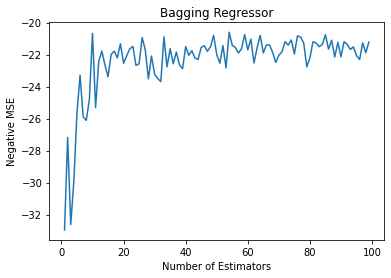

In [26]:
plt.plot(x_ax,y_ax)
plt.title('Bagging Regressor')
plt.xlabel('Number of Estimators')
plt.ylabel('Negative MSE')
plt.show()

In [0]:
x_ax = []
y_ax = []
for i in range(1,100,1):
  ab = AdaBoostRegressor(n_estimators=i)
  scores = cross_val_score(ab,X,y,cv=5,
                           scoring = 'neg_mean_squared_error')
  x_ax.append(i)
  y_ax.append(scores.mean())

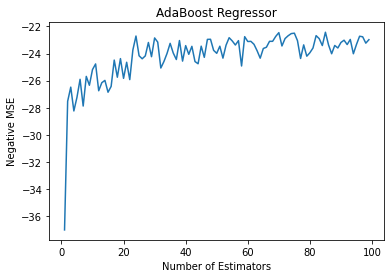

In [28]:
plt.plot(x_ax,y_ax)
plt.title('AdaBoost Regressor')
plt.xlabel('Number of Estimators')
plt.ylabel('Negative MSE')
plt.show()

# **Extra TreeRegressor**

In [0]:
x_ax =[]
y_ax = []
for i in range(1,100,1):
  et = ExtraTreesRegressor(n_estimators=i)
  scores = cross_val_score(et,X,y,cv=5,
                           scoring = 'neg_mean_squared_error')
  x_ax.append(i)
  y_ax.append(scores.mean())

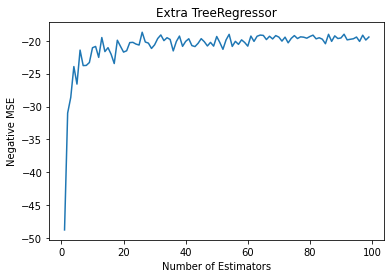

In [30]:
plt.plot(x_ax,y_ax)
plt.title("Extra TreeRegressor")
plt.xlabel('Number of Estimators')
plt.ylabel('Negative MSE')
plt.show()

# **Random Forest Regressor**

In [0]:
x_ax = []
y_ax = []
for i in np.logspace(0,3,num=50,dtype=int):
    rf = RandomForestRegressor(n_estimators=i)
    scores = cross_val_score(rf, X, y, cv=5, 
                             scoring='neg_mean_squared_error')
    x_ax.append(i)
    y_ax.append(scores.mean())

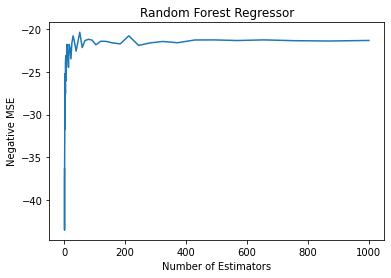

In [33]:
plt.plot(x_ax,y_ax)
plt.title("Random Forest Regressor")
plt.xlabel("Number of Estimators")
plt.ylabel('Negative MSE')
plt.show()